<a href="https://colab.research.google.com/github/sivagunturi/mfr_meta/blob/main/plot_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import six
from PIL import ImageFont
from numpy.random import randn


# noinspection PyPep8Naming
def plt_figure_by_pixel(num=None,  # autoincrement if None, else integer from 1-N
                        figsize=(480, 320),  # defaults to rc figure.figsize
                        dpi=None,  # defaults to rc figure.dpi
                        facecolor=None,  # defaults to rc figure.facecolor
                        edgecolor=None,  # defaults to rc figure.edgecolor
                        frameon=True,
                        FigureClass=plt.Figure,
                        clear=False,
                        **kwargs):
    """
    Create figure by pixel
    """
    if dpi is None:
        dpi = plt.rcParams['figure.dpi']
    figsize = (figsize[0] / dpi, figsize[1] / dpi)
    fig = plt.figure(
        num=num,
        figsize=figsize,
        dpi=dpi,
        facecolor=facecolor,
        edgecolor=edgecolor,
        frameon=frameon,
        FigureClass=FigureClass,
        clear=clear,
        **kwargs)
    return fig


def plt_get_text_width_pixel(text, fontsize=None):
    if fontsize is None:
        fontsize = plt.rcParams['font.size']

    font_name = plt.rcParams['font.sans-serif'][0]
    # font = ImageFont.truetype(font_name, size=int(fontsize))
    font = ImageFont.load_default()
    w, _ = font.getsize(str(text))
    return w


def plt_get_text_height_pixel(fontsize=None):
    if fontsize is None:
        fontsize = plt.rcParams['font.size']
    return fontsize


def plt_get_size_by_pixel(dpi=None):
    """
    get figure size by pixel
    """
    if dpi is None:
        dpi = plt.gcf().dpi

    fig = plt.gcf()
    w = fig.get_figwidth() * dpi
    h = fig.get_figheight() * dpi
    return w, h


def plt_set_margin_by_pixel(top=None, bottom=None, left=None, right=8, fontsize=None, dpi=None):
    """
    set figure margin by pixel
    """
    if dpi is None:
        dpi = plt.rcParams['figure.dpi']
    if fontsize is None:
        fontsize = plt.rcParams['font.size']

    text_size = (fontsize / dpi) * 108
    if top is None:
        title = plt.gca().get_title()
        top = 0 if title is None or title == '' else (fontsize + 8 + 4)
    if bottom is None:
        bottom = text_size + 4 + 4
    if left is None:
        left = text_size + 4 + 4

    w, h = plt_get_size_by_pixel()

    top = 1 - top / h
    bottom = bottom / h
    left = left / w
    right = 1 - right / w

    plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right)


def plot_table(data,
               title=None,
               col_widths=None,
               fontsize=None,
               header_colors=None,
               no_header=False,
               row_colors=None,
               edge_color='w',
               ax=None,
               **kwargs):
    if fontsize is None:
        fontsize = plt.rcParams['font.size']

    # 行列数
    r = len(data)

    row_height = plt_get_text_height_pixel(fontsize) * (1 if r > 2 else 2) + 4 + 4

    if col_widths is None:
        col_widths = get_data_columns_max_width(data, fontsize)

    if ax is None:
        size = (sum(col_widths), row_height * r)
        plt_figure_by_pixel(figsize=size)
        ax = plt.gca()
        ax.axis('off')
    else:
        ax.axis('off')

    top = 0
    if title is not None and title != '':
        title, color = (title, None) if type(title) is str else (title[0], title[1])
        # plt.title(title, ax=ax, color=color, fontsize=fontsize + 2)
        ax.set_title(title, 
             fontweight ="bold", pad=15) 
        top = plt_get_text_height_pixel(fontsize + 2) + 4 + 4

    table = ax.table(cellText=data[1:], colWidths=col_widths, bbox=[0, 0, 1, 1], colLabels=data[0], **kwargs)

    table.auto_set_font_size(False)
    table.set_fontsize(fontsize)

    set_table_cell_default_style(table,
                                 header_colors=header_colors, no_header=no_header,
                                 row_colors=row_colors, edge_color=edge_color)

    plt_set_margin_by_pixel(top=top, bottom=2, left=2, right=2)

    return ax, table, col_widths


# noinspection PyProtectedMember
def set_table_cell_default_style(table, header_colors=None, no_header=False, row_colors=None, edge_color='w'):
    if header_colors is None:
        header_colors = ['#40466e', 'w']
    if type(header_colors) is str:
        header_colors = [header_colors, 'w']

    if row_colors is None:
        row_colors = ['#f1f1f2', 'w']
    if type(row_colors) is str:
        row_colors = [row_colors, 'w']

    for k, cell in six.iteritems(table._cells):
        r, c = k
        cell.set_edgecolor(edge_color)
        if r == 0 and not no_header:
            cell.set_text_props(weight='bold', color=header_colors[1])
            cell.set_facecolor(header_colors[0])
        else:
            cell.set_facecolor(row_colors[r % len(row_colors)])
        cell._loc = 'center'
        cell.PAD = 0

def get_data_columns_max_width(data, fontsize):
    """
    get columns max width
    """
    if type(data) is not np.ndarray:
        data = np.array(data)

    a = []
    for cols in data.T:
        m = max([plt_get_text_width_pixel(x, fontsize) for x in cols])
        a.append(8 + m + 8)
    return a


def test():
    data = (np.random.randn(30 * 20).reshape([-1, 20]) * 100).astype(int).astype(str)
    data[0][0] = 'Test'
    data[5][5] = 'Auto Size Column'
    time_start = time.time()
    plot_table(data)
    plt.show()
    time_spent = time.time() - time_start
    print('spent time', str(int(time_spent * 1000)) + 'ms')



In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os

In [4]:
# def plot_table(df, title):
#   df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#   df = df.sort_values(by=['accuracy', 'f1_score'], ascending=False)
#   fig, ax = plt.subplots()
#   fig.patch.set_visible(False)
#   ax.axis('off')
#   ax.axis('tight')
#   # ax.set_title(title)
#   t= ax.table(cellText=df.values,  colLabels=df.columns,  loc='center', cellLoc='center', colColours =["palegreen"] * 10, colWidths=[0.3 for x in df.columns])
#   t.auto_set_font_size(False) 
#   t.set_fontsize(10)
#   ax.set_title(title, 
#              fontweight ="bold", pad=30) 
#   fig.tight_layout()
#   plt.show()


In [5]:
def get_title(path):
  name = os.path.basename(path)
  m = name.split(".")
  result = m[0].split("_")
  tmp = ""
  if(result[2] == "None"):
    tmp = "no augumentation"
  if(result[2] == "Mask"):
    tmp = "masked augumentation"
  if(result[2] == "All"):
    tmp = "mask/unmask augumentation"
  title = result[1] + " pretrained model with " + tmp
  return title

In [6]:
def plot_data(df, title) :
  # plt.rcParams["figure.figsize"] = [7.50, 3.50]
  # plt.rcParams["figure.autolayout"] = True
  df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

  df["no_of_classes_no_of_samples"] = df["no_of_classes"].astype(str) + "_" + df["no_of_samples"].astype(str)

  df. drop(["no_of_classes", "no_of_samples"], axis=1, inplace=True)

  plt.rcParams["figure.figsize"] = (15, 5)
  # fig, ax = plt.subplots()
  df.plot(x='no_of_classes_no_of_samples', y= ['accuracy',	'precision',	'recall',	'f1_score'], kind= 'bar',  width = 0.5)
  df['accuracy'].plot(secondary_y=False)
  # df.plot(x='no_of_classes_no_of_samples', y= ['accuracy',	'precision',	'recall',	'f1_score'], kind='line')
  # df.plot(kind='line', marker='*',  ms=10)
  # df.plot.bar(rot=0)

  plt.xlabel('no_of_classes_no_of_samples')
  plt.ylabel('Metrics')
  plt.title(title)

  plt.show()

/content/gdrive/MyDrive/thesis_work/experiment_results/original/arcface/mfr_ArcFace_Mask.csv


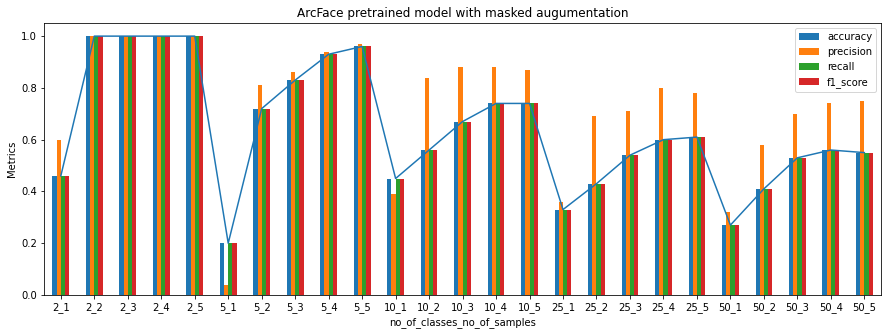

/content/gdrive/MyDrive/thesis_work/experiment_results/original/arcface/mfr_ArcFace_All.csv


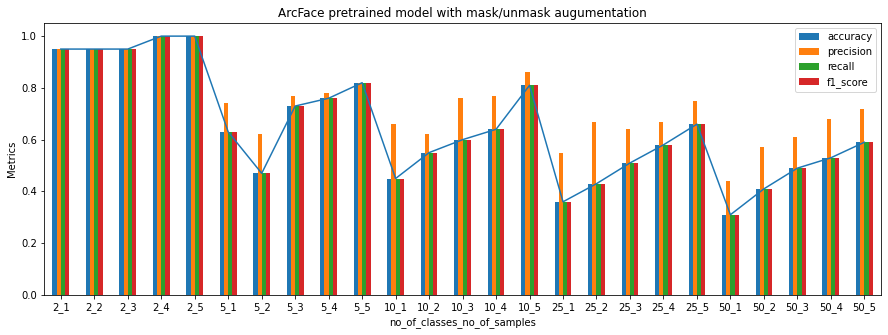

/content/gdrive/MyDrive/thesis_work/experiment_results/original/arcface/mfr_ArcFace_None.csv


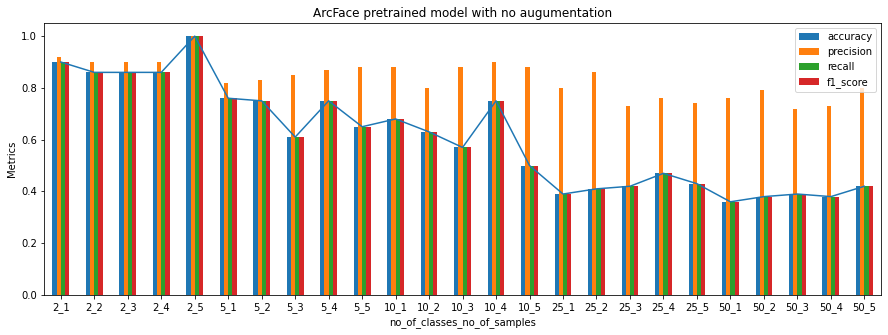

/content/gdrive/MyDrive/thesis_work/experiment_results/original/vggface/mfr_VGG-Face_Mask.csv


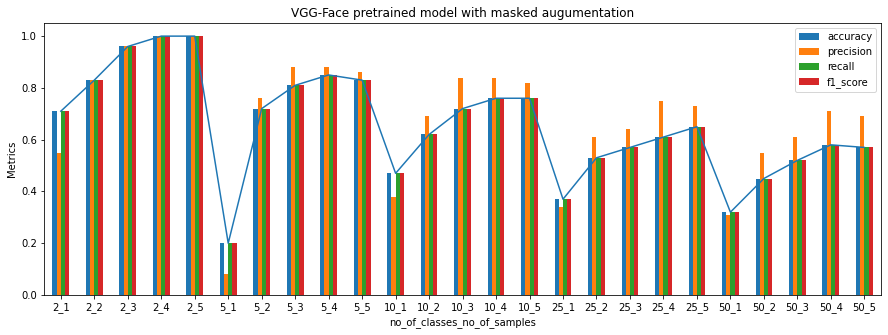

/content/gdrive/MyDrive/thesis_work/experiment_results/original/vggface/mfr_VGG-Face_None.csv


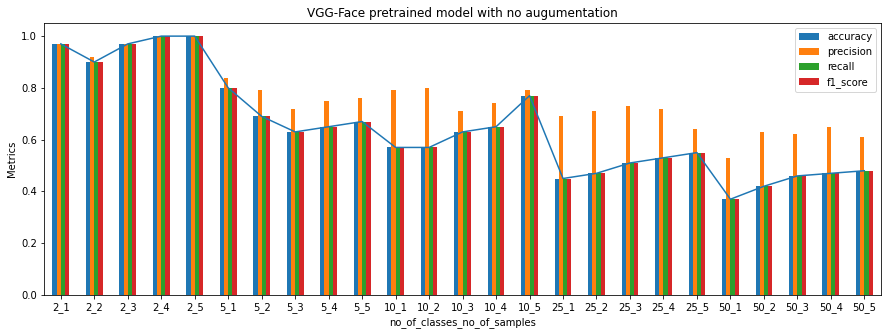

/content/gdrive/MyDrive/thesis_work/experiment_results/original/vggface/mfr_VGG-Face_All.csv


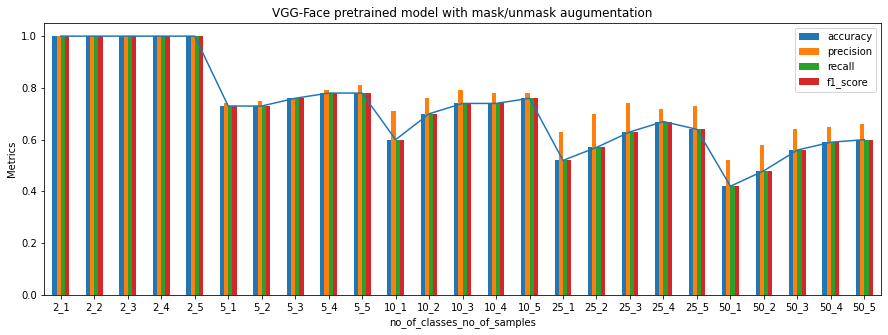

/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepface/mfr_DeepFace_Mask.csv


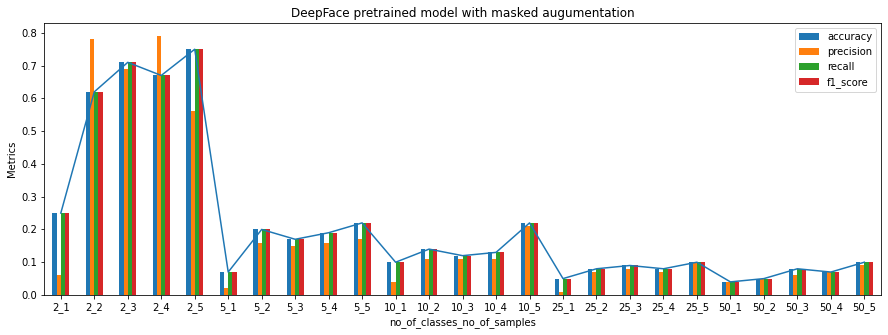

/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepface/mfr_DeepFace_None.csv


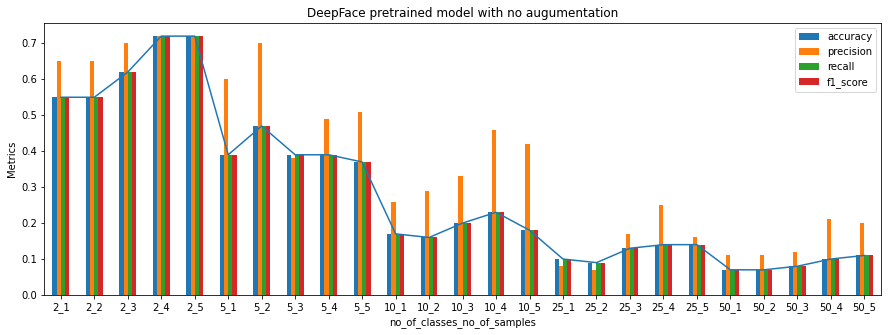

/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepface/mfr_DeepFace_All.csv


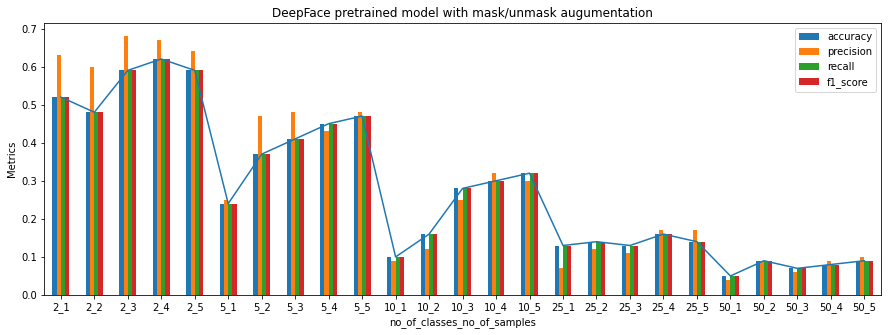

/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepid/mfr_DeepID_None.csv


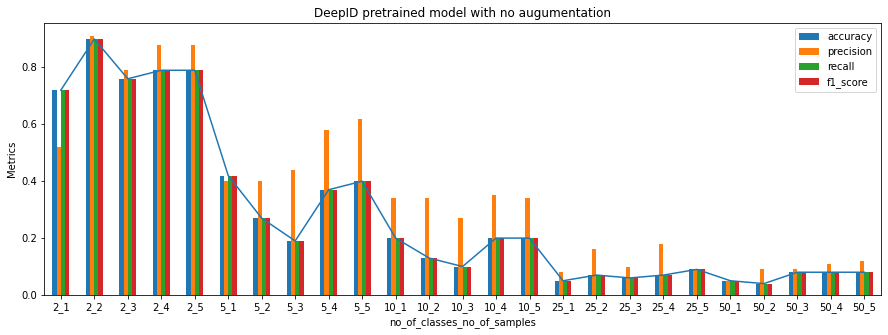

/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepid/mfr_DeepID_Mask.csv


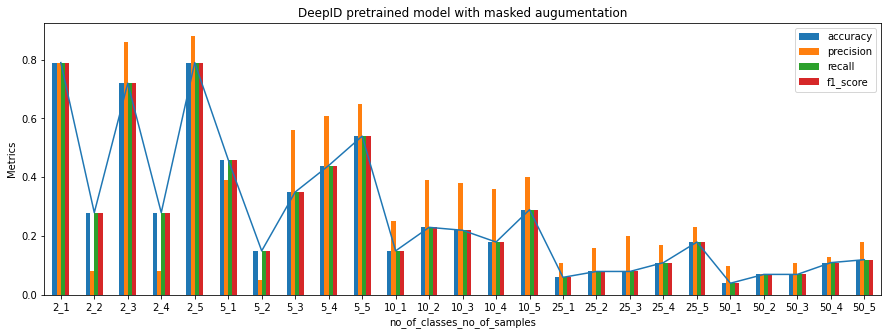

/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepid/mfr_DeepID_All.csv


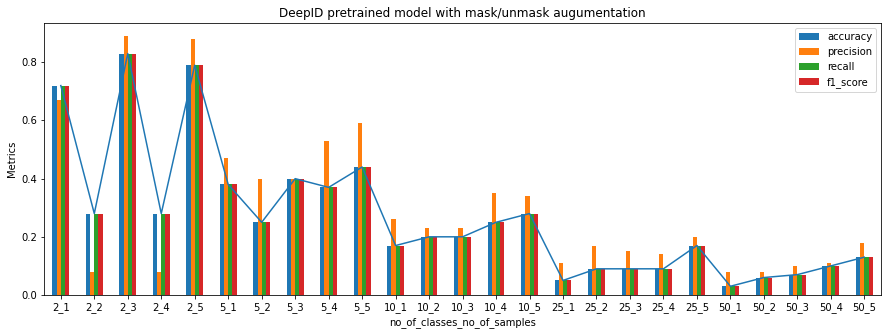

/content/gdrive/MyDrive/thesis_work/experiment_results/original/dlib/mfr_Dlib_None.csv


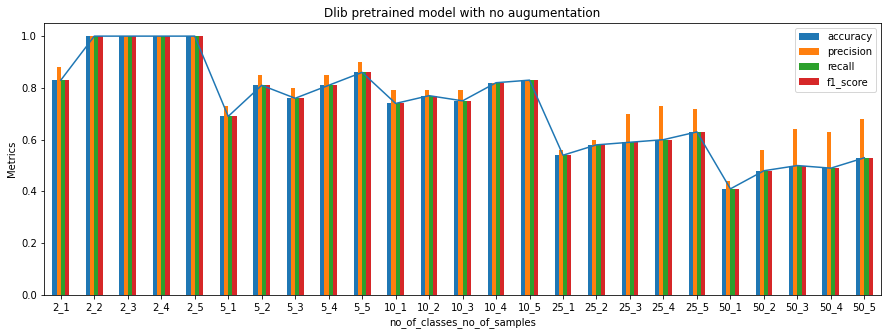

/content/gdrive/MyDrive/thesis_work/experiment_results/original/dlib/mfr_Dlib_Mask.csv


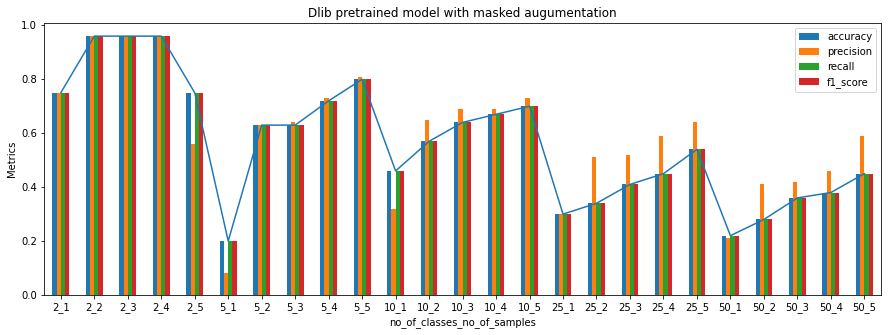

/content/gdrive/MyDrive/thesis_work/experiment_results/original/dlib/mfr_Dlib_All.csv


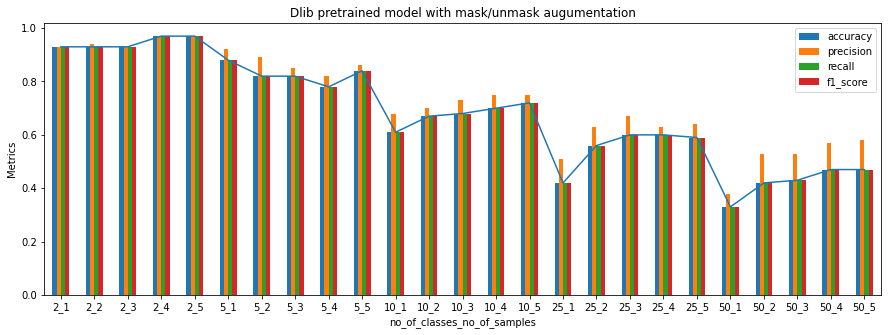

/content/gdrive/MyDrive/thesis_work/experiment_results/original/openface/mfr_OpenFace_None.csv


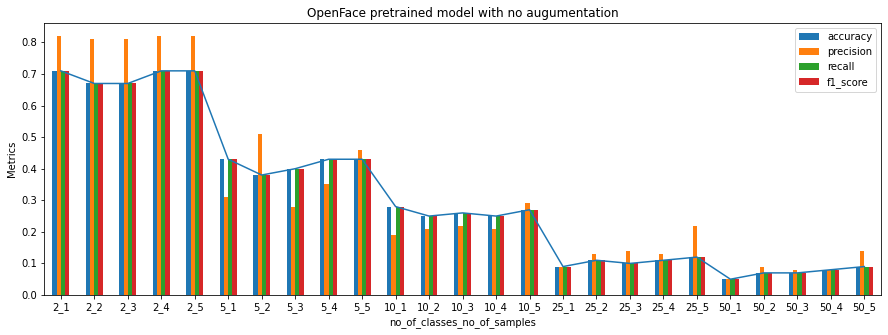

/content/gdrive/MyDrive/thesis_work/experiment_results/original/openface/mfr_OpenFace_Mask.csv


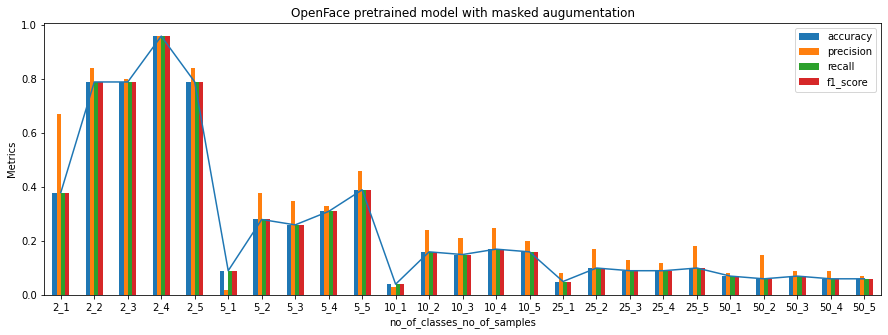

/content/gdrive/MyDrive/thesis_work/experiment_results/original/openface/mfr_OpenFace_All.csv


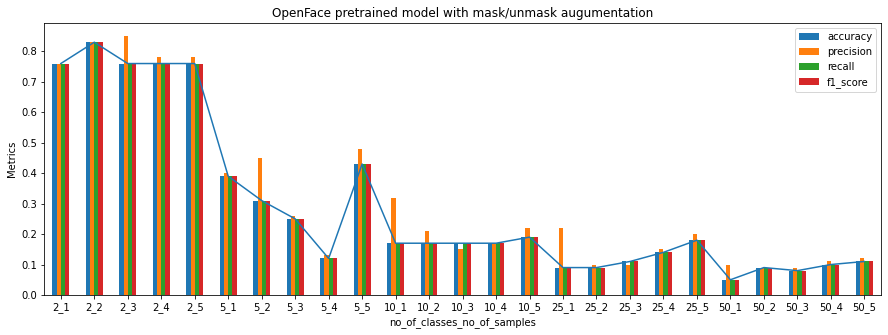

/content/gdrive/MyDrive/thesis_work/experiment_results/original/mobilenet/mfr_MobileNet_V3_None.csv


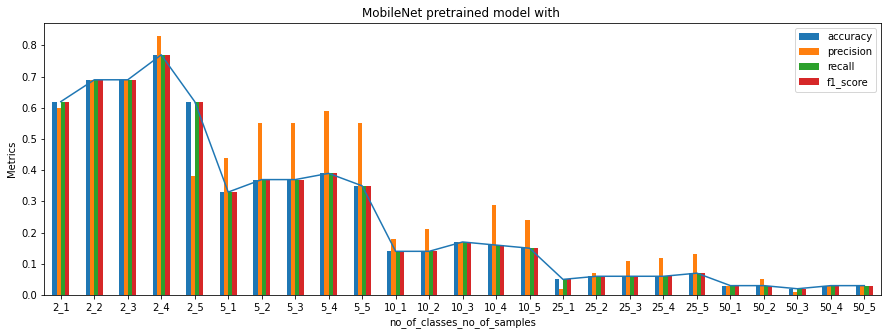

/content/gdrive/MyDrive/thesis_work/experiment_results/original/mobilenet/mfr_MobileNet_V3_Mask.csv


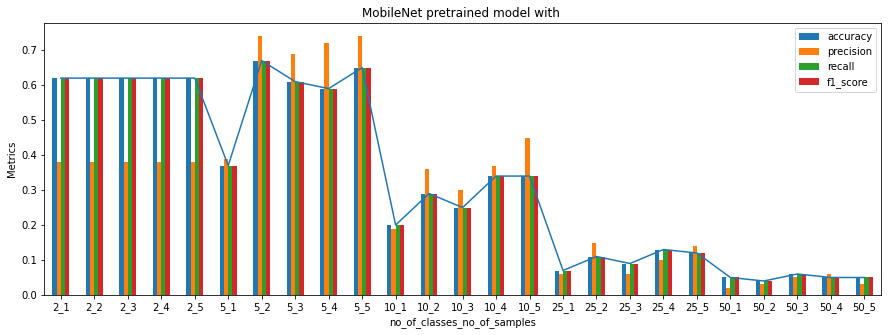

/content/gdrive/MyDrive/thesis_work/experiment_results/original/mobilenet/mfr_MobileNet_V3_All.csv


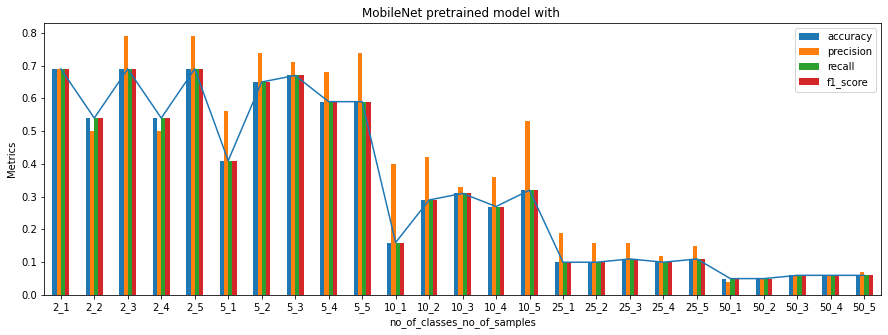

/content/gdrive/MyDrive/thesis_work/experiment_results/original/facenet512/mfr_Facenet512_Mask.csv


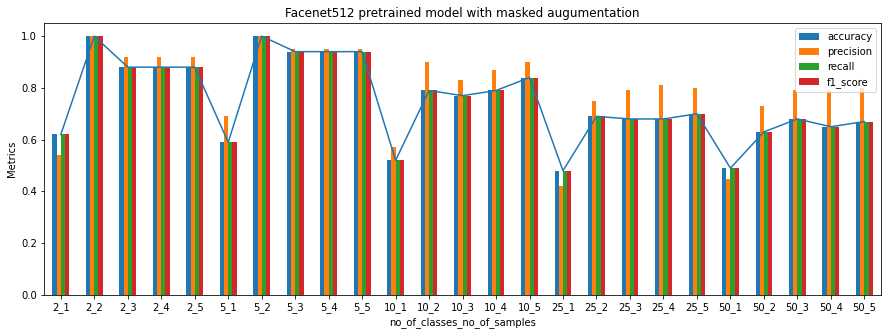

/content/gdrive/MyDrive/thesis_work/experiment_results/original/facenet512/mfr_Facenet512_All.csv


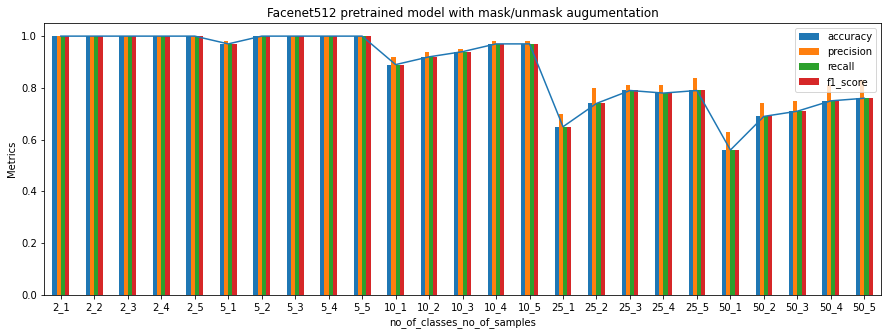

/content/gdrive/MyDrive/thesis_work/experiment_results/original/facenet512/mfr_Facenet512_None.csv


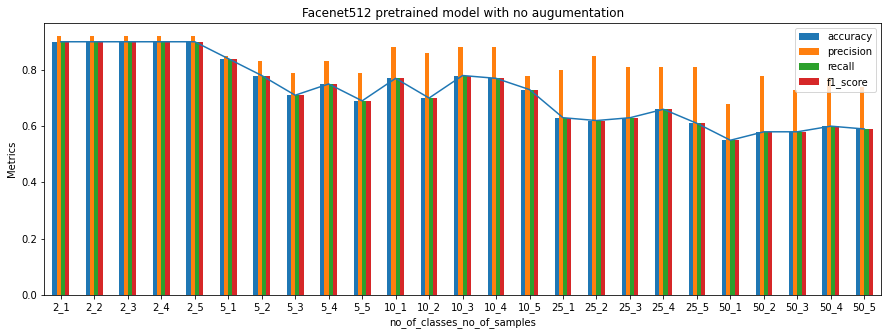

/content/gdrive/MyDrive/thesis_work/experiment_results/original/facenet/mfr_Facenet_None.csv


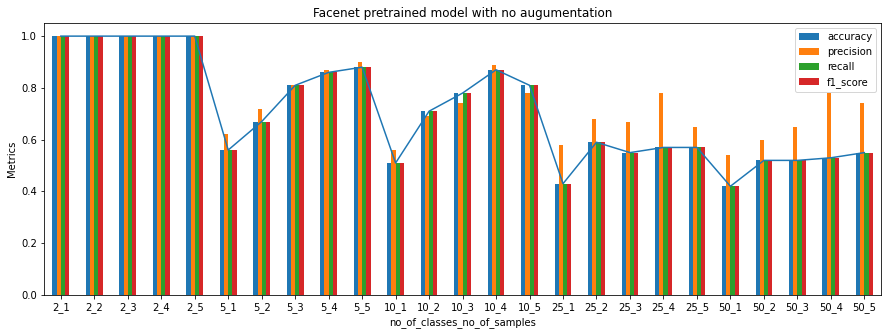

/content/gdrive/MyDrive/thesis_work/experiment_results/original/facenet/mfr_Facenet_All.csv


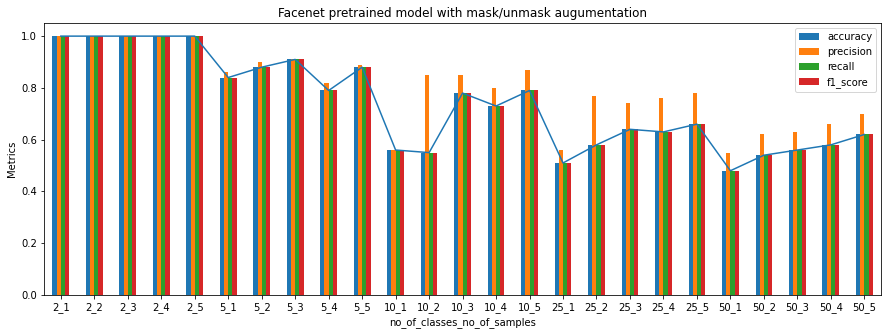

/content/gdrive/MyDrive/thesis_work/experiment_results/original/facenet/mfr_Facenet_Mask.csv


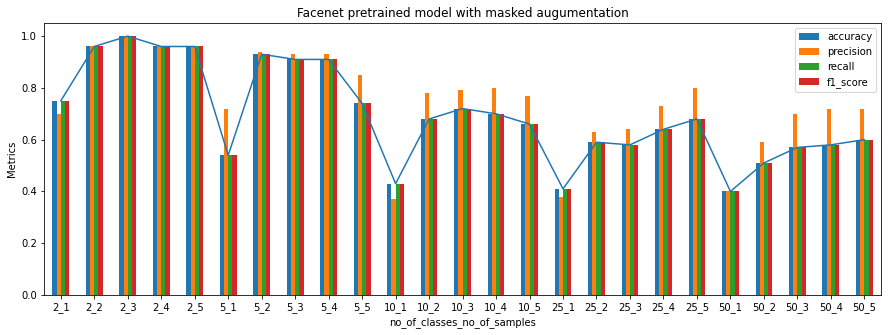

/content/gdrive/MyDrive/thesis_work/experiment_results/original/nasnet/mfr_nasnet_None.csv


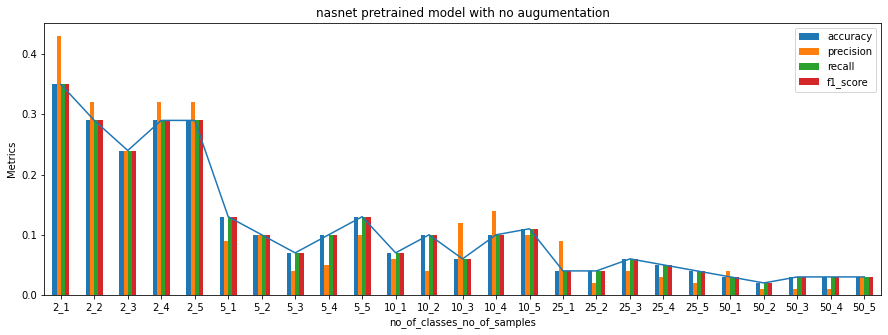

/content/gdrive/MyDrive/thesis_work/experiment_results/original/nasnet/mfr_nasnet_Mask.csv


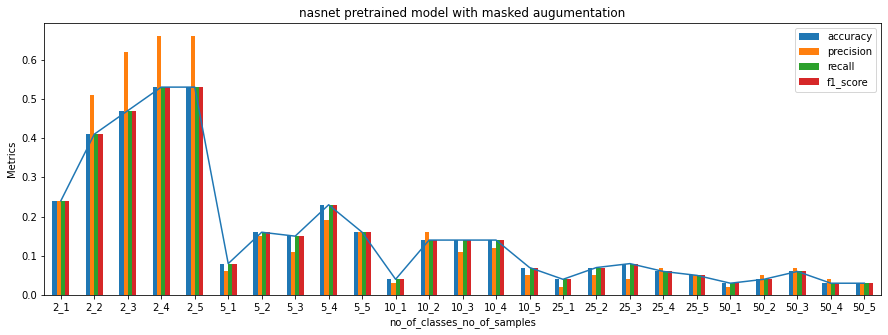

/content/gdrive/MyDrive/thesis_work/experiment_results/original/nasnet/mfr_nasnet_All.csv


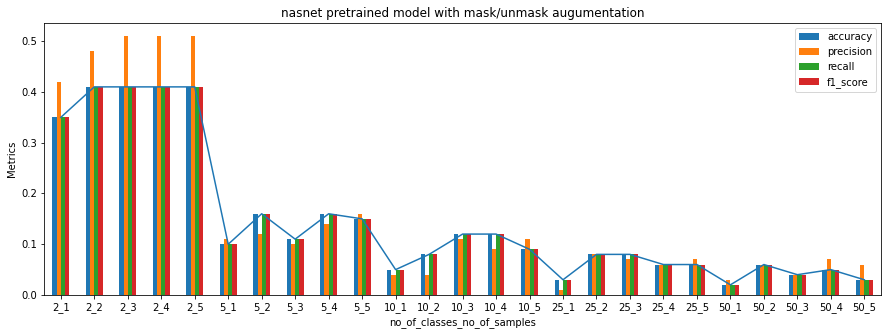

In [7]:
csv_list = []
for csv_file in Path('/content/gdrive/MyDrive/thesis_work/experiment_results/original').rglob('*.csv'):
  csv_list.append(csv_file)
for file in csv_list:
  print(file)
  df = pd.read_csv(file)
  title = get_title(file)
  # plot_table(df, title)
  plot_data(df, title)



In [8]:
pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 16.0 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=60643c3ef25f672283ec02e81521920250e2bf7a6e4471e1cc80fdb91950be46
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [9]:
import docx
import pandas as pd

def save_table_to_docx(df):
  # open an existing document
  doc = docx.Document('./test.docx')

  # add a table to the end and create a reference variable
  # extra row is so we can add the header row
  t = doc.add_table(df.shape[0]+1, df.shape[1])

  # add the header rows.
  for j in range(df.shape[-1]):
      t.cell(0,j).set_fontweight("bold")
      t.cell(0,j).text = df.columns[j] 
  # add the rest of the data frame
  for i in range(df.shape[0]):
      for j in range(df.shape[-1]):
          t.cell(i+1,j).text = str(df.values[i,j])

  # save the doc
  doc.save('./test.docx')

In [10]:
cd /content/gdrive/MyDrive/thesis_work/experiment_results/

/content/gdrive/MyDrive/thesis_work/experiment_results


In [11]:
ls -l 

total 25
drwx------  2 root root 4096 May 26 02:47 backup/
drwx------  2 root root 4096 Jun  6 06:01 dataset_5_5/
drwx------  2 root root 4096 Jun  6 05:58 dataset_5_5_no_augumentation/
drwx------ 12 root root 4096 Jun  5 03:28 original/
-rw-------  1 root root 9151 Jun  5 11:12 test.docx


/content/gdrive/MyDrive/thesis_work/experiment_results/original/arcface/mfr_ArcFace_Mask.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/arcface/mfr_ArcFace_All.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/arcface/mfr_ArcFace_None.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/vggface/mfr_VGG-Face_Mask.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/vggface/mfr_VGG-Face_None.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/vggface/mfr_VGG-Face_All.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepface/mfr_DeepFace_Mask.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepface/mfr_DeepFace_None.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepface/mfr_DeepFace_All.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/deepid/mfr_DeepID_None.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/de

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/gdrive/MyDrive/thesis_work/experiment_results/original/facenet/mfr_Facenet_None.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/facenet/mfr_Facenet_All.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/facenet/mfr_Facenet_Mask.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/nasnet/mfr_nasnet_None.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/nasnet/mfr_nasnet_Mask.csv
/content/gdrive/MyDrive/thesis_work/experiment_results/original/nasnet/mfr_nasnet_All.csv


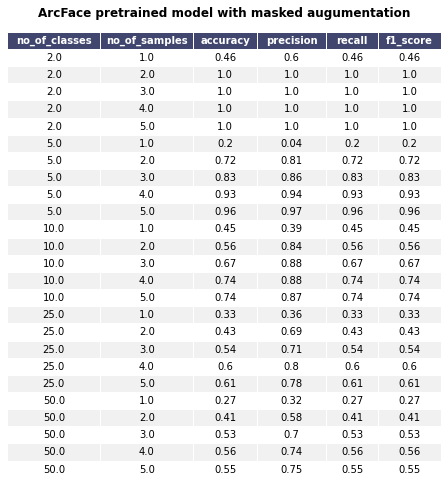

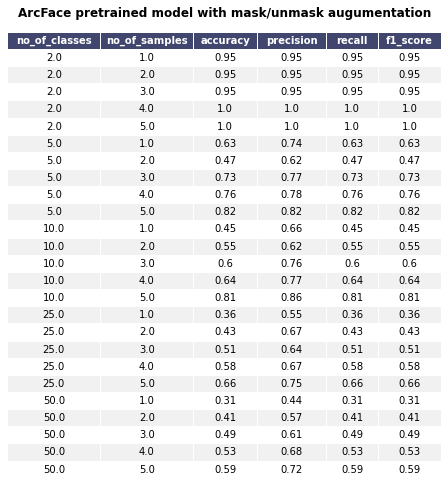

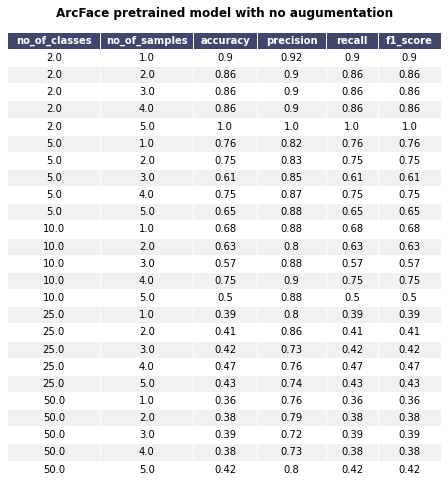

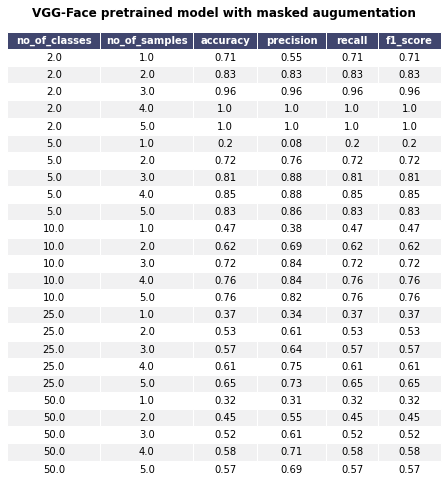

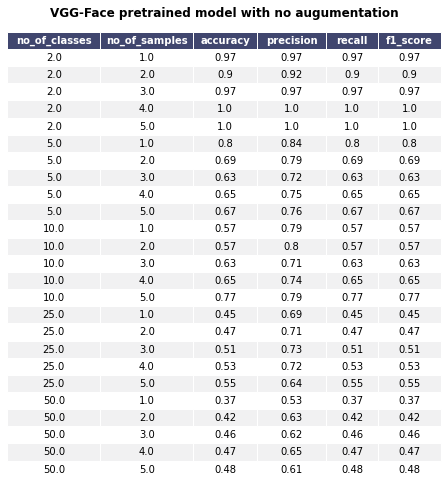

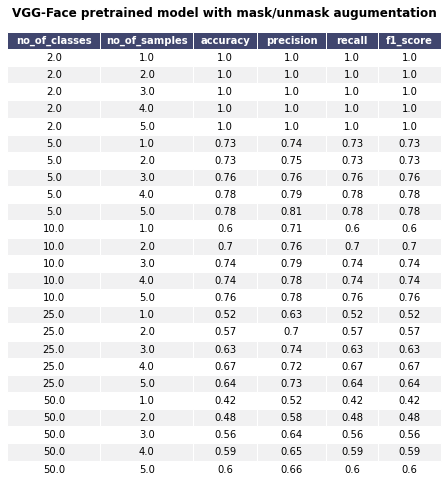

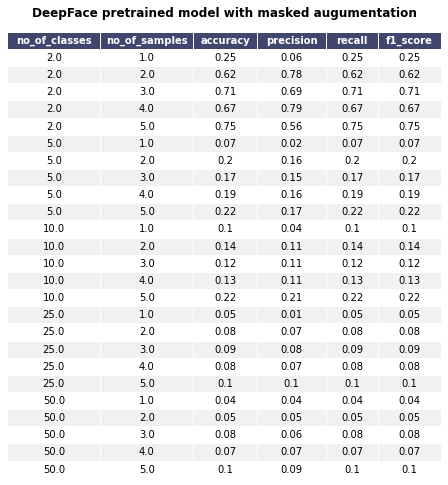

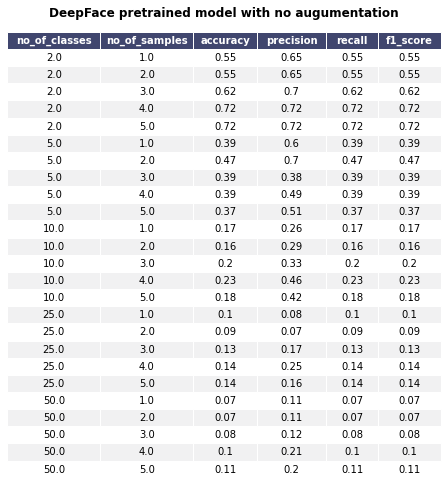

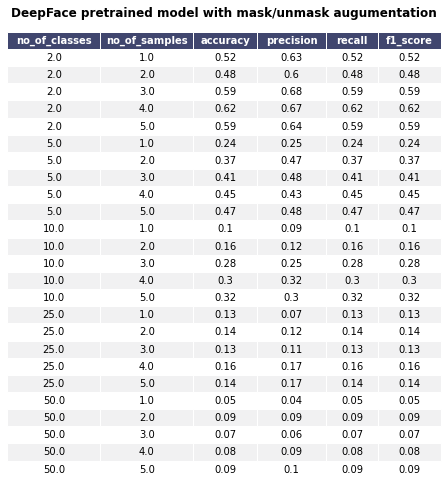

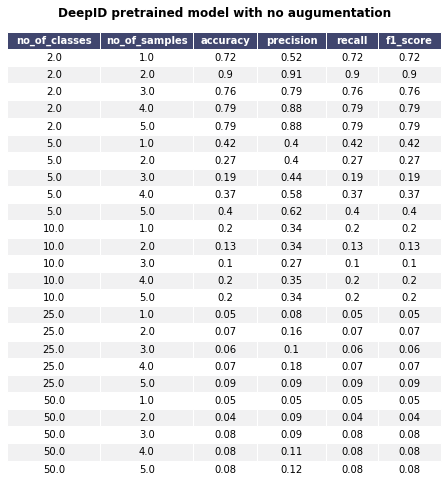

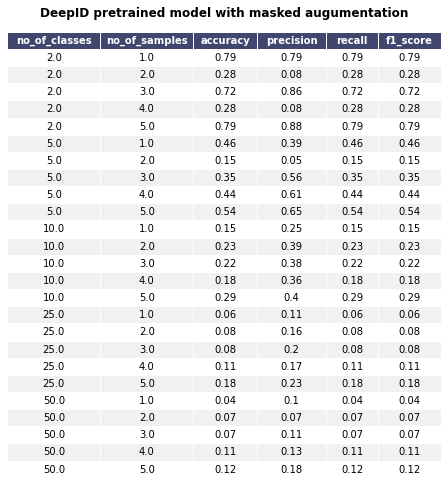

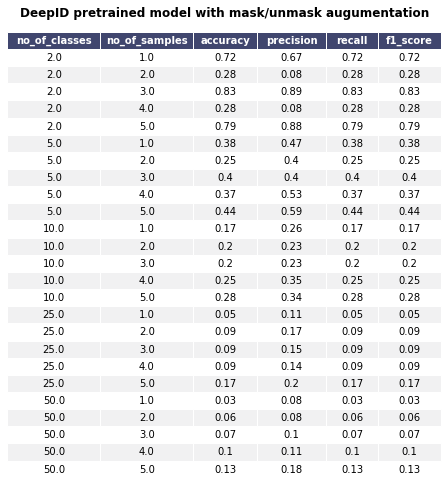

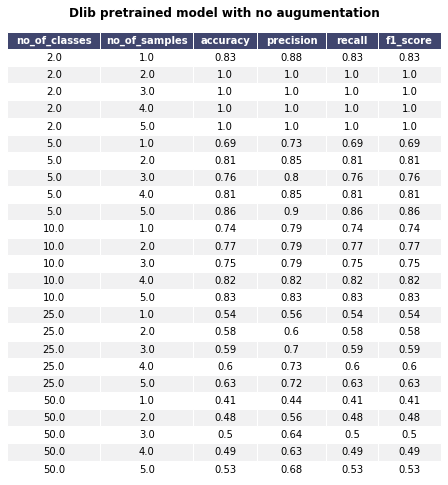

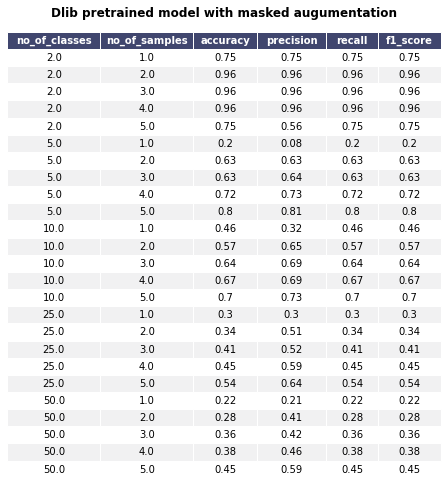

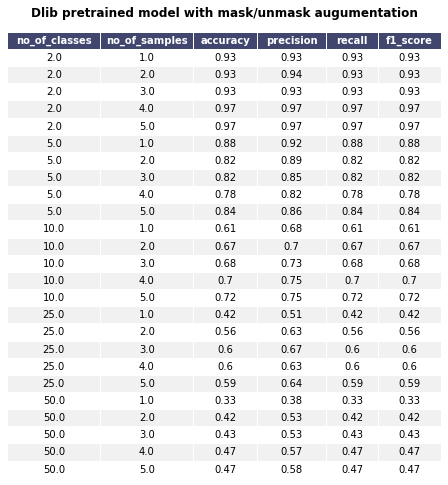

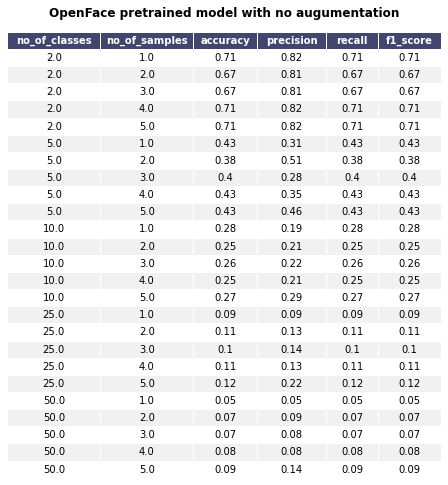

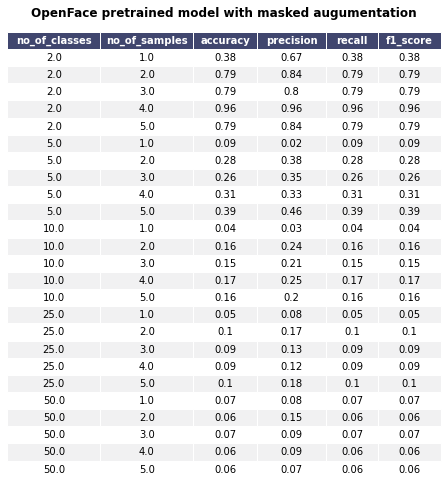

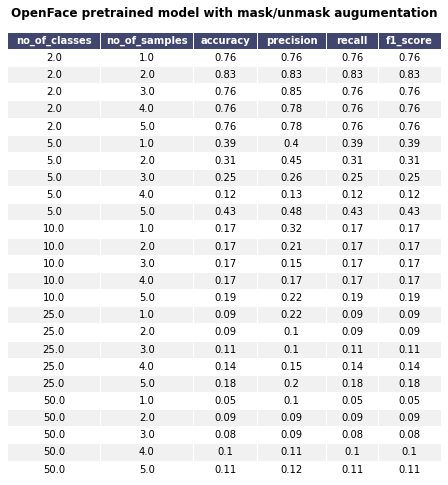

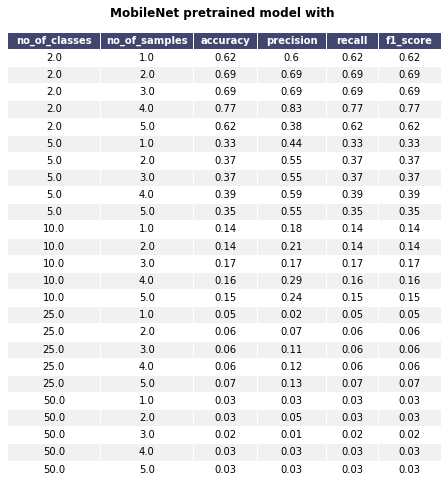

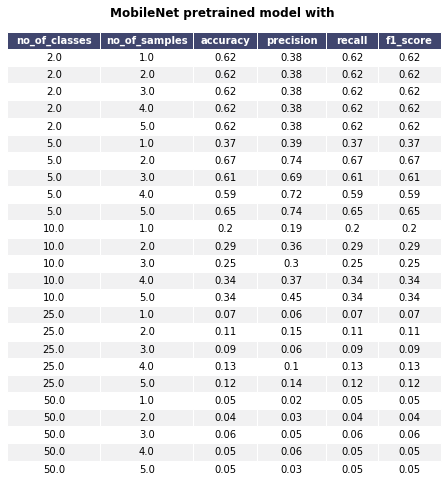

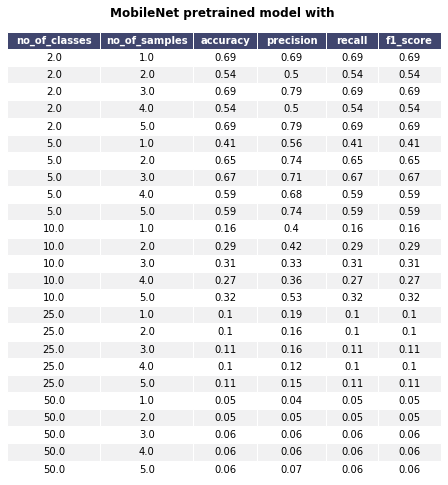

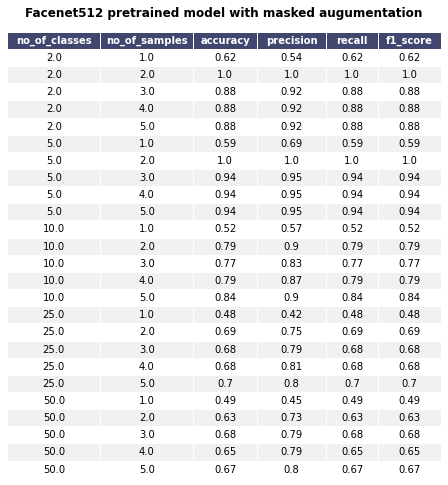

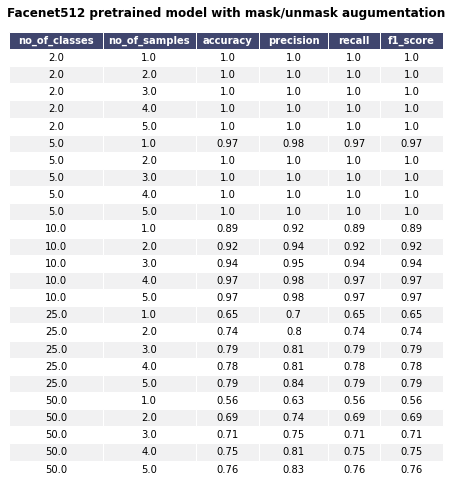

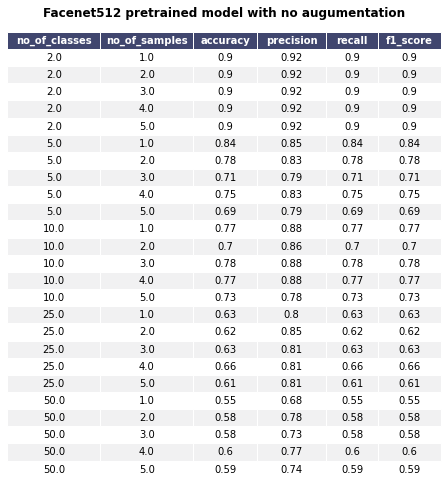

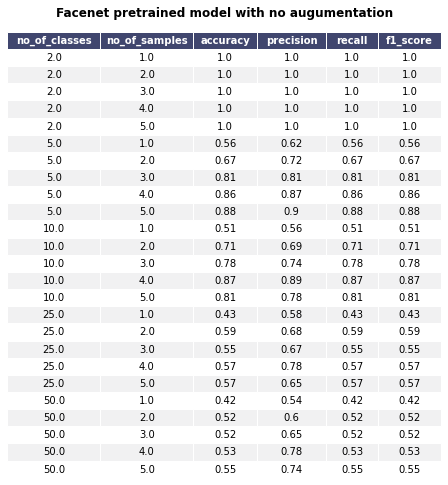

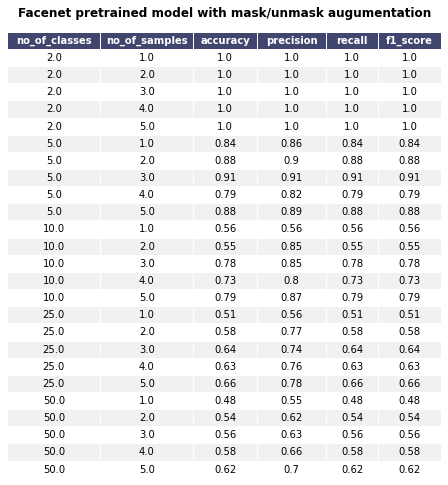

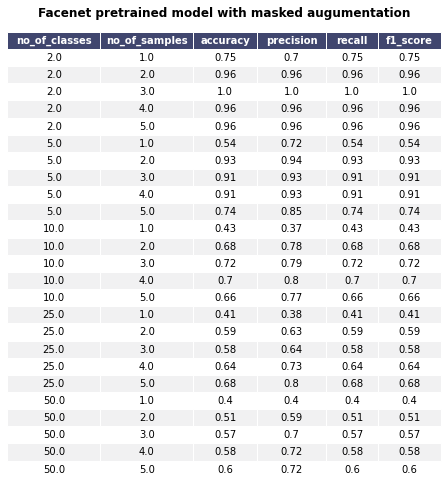

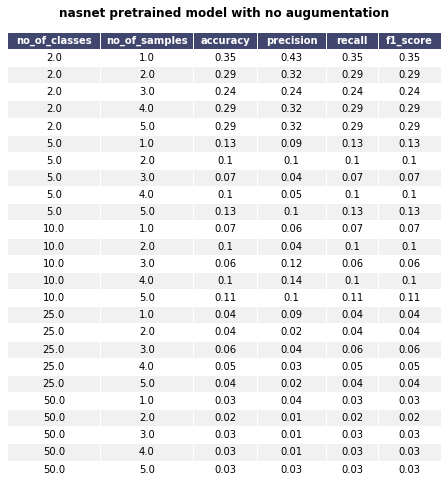

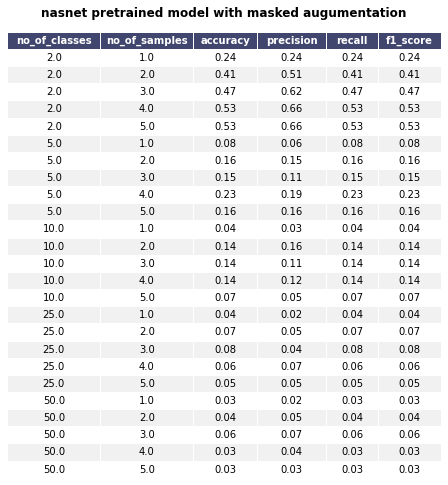

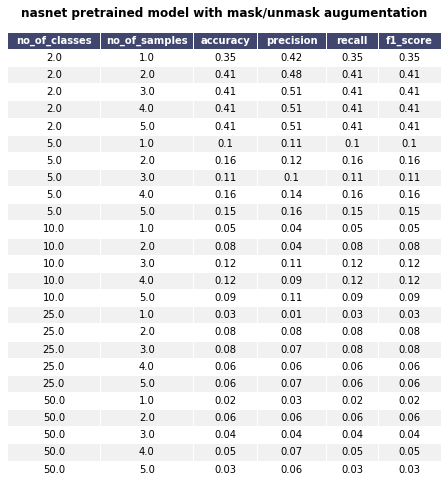

In [12]:
csv_list = []
for csv_file in Path('/content/gdrive/MyDrive/thesis_work/experiment_results/original').rglob('*.csv'):
  csv_list.append(csv_file)
for file in csv_list:
  print(file)
  df = pd.read_csv(file)
  df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
  data = np.vstack((df.columns.values, df.values.astype(str)))
  title_string = get_title(file)
  plot_table(data, title= title_string)
  # plot_data(df, title)
# df = pd.read_csv(csv_list[0])
# title = get_title(csv_list[0])
# save_table_to_docx(df)